<a href="https://colab.research.google.com/github/hrushikute/DataAnalytics/blob/master/03_image_classification_using_CNN_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile


In [2]:
# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

--2021-07-15 10:13:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.214.128, 173.194.215.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   178MB/s    in 0.6s    

2021-07-15 10:14:00 (178 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [3]:
zip_ref= zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
#lets check inside ppizza directory
!ls pizza_steak/train/pizza/

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [6]:
#Lets go through Pizza and steak directory and check out number of files
import os

for dirpath, dirname, filenames in os.walk("pizza_steak"):
  print("There are {} directories in {} and it contain {} files".format(len(dirname),dirpath,len(filenames)))

There are 2 directories in pizza_steak and it contain 1 files
There are 2 directories in pizza_steak/test and it contain 1 files
There are 0 directories in pizza_steak/test/pizza and it contain 250 files
There are 0 directories in pizza_steak/test/steak and it contain 250 files
There are 2 directories in pizza_steak/train and it contain 1 files
There are 0 directories in pizza_steak/train/pizza and it contain 750 files
There are 0 directories in pizza_steak/train/steak and it contain 750 files


In [7]:
# get the classes in class_names array
import numpy as np
import pathlib

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['.DS_Store' 'pizza' 'steak']


In [8]:
# remove .DS_store its a garbage.
class_names=class_names[1:]
class_names

array(['pizza', 'steak'], dtype='<U9')

In [9]:
# lets view the images 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_entry(target_dir, target_class):
  target_folder = target_dir + target_class

  # Get random image path
  random_image = random.sample(os.listdir(target_folder),1)

  # read image and plot it 
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  
  print(f"Image shape : {img.shape}")
  return img

Image shape : (512, 512, 3)


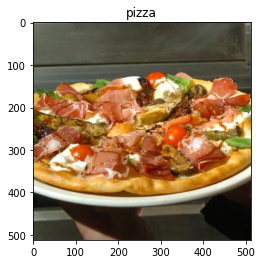

In [10]:
img = view_random_entry(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [13]:
#crete train and test data generators and rescale them
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)


In [17]:
# Trun it into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(244,244),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(244,244),
                                               class_mode='binary',
                                               batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
